In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [107]:
df=pd.read_csv("Mall_Customers.csv")

In [108]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [109]:
df.shape

(200, 5)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [111]:
df.isnull().sum()/len(df)*100

CustomerID                0.0
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [112]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [113]:
# we take 2 feature because we are not able to see cluster in morethan 2 d

In [114]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]

In [115]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


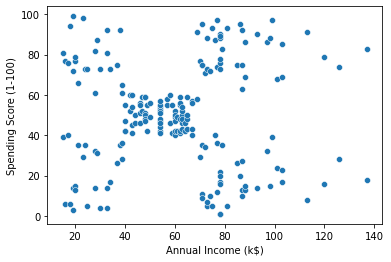

In [116]:
sns.scatterplot(x['Annual Income (k$)'],x['Spending Score (1-100)']);

In [117]:
Km= KMeans()

In [118]:
clusters=Km.fit_predict(x)
clusters

array([4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6,
       4, 6, 4, 6, 4, 0, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 0, 6, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 7, 1, 7, 2, 7, 2, 7,
       1, 7, 2, 7, 2, 7, 2, 7, 2, 7, 1, 7, 2, 7, 1, 7, 2, 7, 2, 7, 2, 7,
       2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7,
       2, 7, 2, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3])

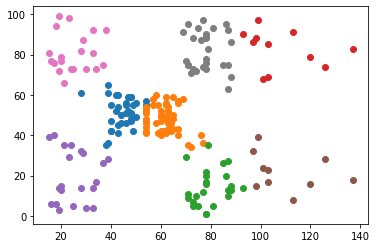

In [119]:
plt.scatter(x[clusters==0]['Annual Income (k$)'],x[clusters==0]['Spending Score (1-100)'])
plt.scatter(x[clusters==1]['Annual Income (k$)'],x[clusters==1]['Spending Score (1-100)'])
plt.scatter(x[clusters==2]['Annual Income (k$)'],x[clusters==2]['Spending Score (1-100)'])
plt.scatter(x[clusters==3]['Annual Income (k$)'],x[clusters==3]['Spending Score (1-100)'])
plt.scatter(x[clusters==4]['Annual Income (k$)'],x[clusters==4]['Spending Score (1-100)'])
plt.scatter(x[clusters==5]['Annual Income (k$)'],x[clusters==5]['Spending Score (1-100)'])
plt.scatter(x[clusters==6]['Annual Income (k$)'],x[clusters==6]['Spending Score (1-100)'])
plt.scatter(x[clusters==7]['Annual Income (k$)'],x[clusters==7]['Spending Score (1-100)'])

In [120]:
# he take k=8 but we cant sure it is correct or not so we use elbow method for k 

In [121]:
silhouette_score(x,Km.labels_)

0.45468661217238365

In [122]:
# using elbow method we find optimize k

In [123]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[269981.28,
 183069.17582751293,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30227.606513152015,
 25022.48500453035,
 21850.165282585633]

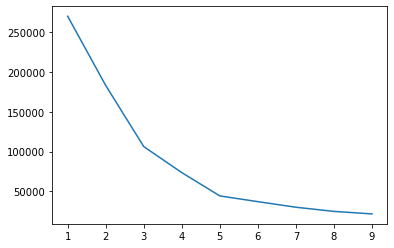

In [124]:
plt.plot(list(range(1,10)),wcss)

In [125]:
Km= KMeans(n_clusters=5)

In [126]:
clusters=Km.fit_predict(x)
clusters

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

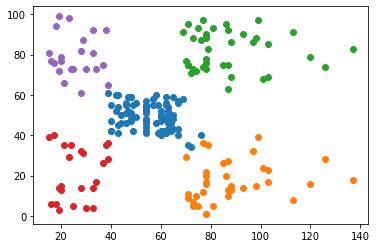

In [127]:
plt.scatter(x[clusters==0]['Annual Income (k$)'],x[clusters==0]['Spending Score (1-100)'])
plt.scatter(x[clusters==1]['Annual Income (k$)'],x[clusters==1]['Spending Score (1-100)'])
plt.scatter(x[clusters==2]['Annual Income (k$)'],x[clusters==2]['Spending Score (1-100)'])
plt.scatter(x[clusters==3]['Annual Income (k$)'],x[clusters==3]['Spending Score (1-100)'])
plt.scatter(x[clusters==4]['Annual Income (k$)'],x[clusters==4]['Spending Score (1-100)'])
plt.scatter(x[clusters==5]['Annual Income (k$)'],x[clusters==5]['Spending Score (1-100)'])
plt.scatter(x[clusters==6]['Annual Income (k$)'],x[clusters==6]['Spending Score (1-100)'])
plt.scatter(x[clusters==7]['Annual Income (k$)'],x[clusters==7]['Spending Score (1-100)'])

In [128]:
silhouette_score(x,Km.labels_)

0.553931997444648

# try with different datset

In [169]:
df=sns.load_dataset("iris")

In [170]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [171]:
x=df[['sepal_length','petal_length']]

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

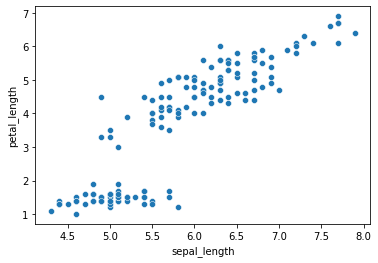

In [172]:
sns.scatterplot(x['sepal_length'],x['petal_length'])

In [173]:
kmeans=KMeans()

In [174]:
clusters=kmeans.fit_predict(x)

In [175]:
clusters

array([7, 0, 0, 0, 0, 7, 0, 0, 0, 0, 7, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7,
       0, 7, 0, 0, 0, 7, 7, 0, 0, 7, 7, 7, 0, 0, 7, 0, 0, 7, 0, 0, 0, 0,
       7, 0, 7, 0, 7, 0, 5, 5, 5, 3, 5, 3, 1, 4, 5, 4, 4, 3, 3, 1, 4, 5,
       3, 3, 1, 3, 1, 3, 1, 1, 5, 5, 5, 5, 1, 4, 3, 4, 3, 1, 3, 1, 5, 5,
       3, 3, 3, 1, 3, 4, 3, 3, 3, 3, 4, 3, 6, 1, 2, 6, 6, 2, 3, 2, 6, 2,
       6, 6, 6, 1, 1, 6, 6, 2, 2, 1, 6, 1, 2, 1, 6, 2, 1, 1, 6, 2, 2, 2,
       6, 1, 6, 2, 6, 6, 1, 6, 6, 5, 1, 6, 6, 6, 1, 6, 6, 1])

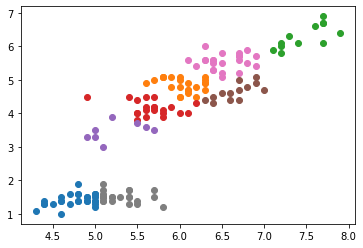

In [176]:
plt.scatter(x[clusters==0]['sepal_length'],x[clusters==0]['petal_length'])
plt.scatter(x[clusters==1]['sepal_length'],x[clusters==1]['petal_length'])
plt.scatter(x[clusters==2]['sepal_length'],x[clusters==2]['petal_length'])
plt.scatter(x[clusters==3]['sepal_length'],x[clusters==3]['petal_length'])
plt.scatter(x[clusters==4]['sepal_length'],x[clusters==4]['petal_length'])
plt.scatter(x[clusters==5]['sepal_length'],x[clusters==5]['petal_length'])
plt.scatter(x[clusters==6]['sepal_length'],x[clusters==6]['petal_length'])
plt.scatter(x[clusters==7]['sepal_length'],x[clusters==7]['petal_length'])

In [177]:
silhouette_score(x,kmeans.labels_)

0.41472605559499875

In [178]:
# it not much good so we apply elbow method

In [179]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[566.4937333333332,
 112.99207175925925,
 53.809978644106934,
 34.317020779220776,
 25.639459375524595,
 21.817690144755367,
 18.571721314154956,
 14.99342214790041,
 13.463496031746033,
 11.722208804896585]

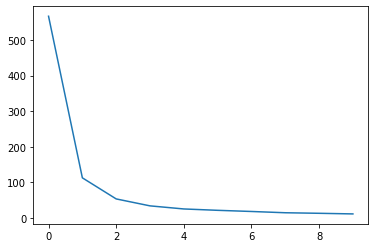

In [180]:
plt.plot(wcss)

In [181]:
# so our optimal k value is 2

In [182]:
kmeans=KMeans(n_clusters=2)

In [183]:
clusters=kmeans.fit_predict(x)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

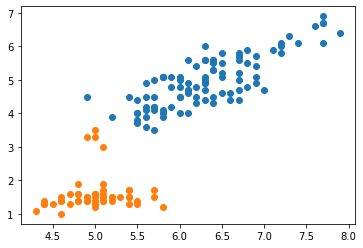

In [184]:
plt.scatter(x[clusters==0]['sepal_length'],x[clusters==0]['petal_length'])
plt.scatter(x[clusters==1]['sepal_length'],x[clusters==1]['petal_length'])

In [185]:
silhouette_score(x,kmeans.labels_)

0.7097529826994816